In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('ETH2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 7:3
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [5]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 486.5175396454347
MAPE: 18.257876165901603
MSE: 236699.3163826471


Giá trị RMSE khoảng 486.52 cho thấy mức độ sai số trung bình của mô hình. So với giá trị trước đó (803.52 với tỷ lệ 6:4), RMSE đã giảm đáng kể, cho thấy mô hình dự báo chính xác hơn khi sử dụng tỷ lệ train-test 7:3.

Với giá trị MAPE khoảng 18.26%, mô hình dự báo có sai số trung bình là khoảng 18.26% so với giá trị thực. Đây là một mức độ sai số khá chấp nhận được và cải thiện đáng kể so với giá trị trước đó (46.33% với tỷ lệ 6:4), cho thấy mô hình dự báo chính xác và đáng tin cậy hơn.

Giá trị MSE khoảng 236699.32 cũng giảm đáng kể so với giá trị trước đó (645648.14 với tỷ lệ 6:4), cho thấy mức độ sai số của mô hình đã được giảm thiểu.

### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    1751.456207
1816    1779.183665
1817    1740.643868
1818    1728.136370
1819    1686.353393
1820    1571.396462
1821    1555.937373
1822    1520.970843
1823    1493.639861
1824    1425.574758
1825    1476.386651
1826    1522.283627
1827    1505.928180
1828    1512.722757
1829    1474.792025
1830    1508.234594
1831    1536.550817
1832    1549.862253
1833    1593.557469
1834    1636.251455
1835    1581.694035
1836    1573.224037
1837    1538.186571
1838    1562.937770
1839    1544.368045
1840    1515.687299
1841    1523.593949
1842    1514.852078
1843    1519.142309
1844    1523.580941
1845    1488.478192
dtype: float64


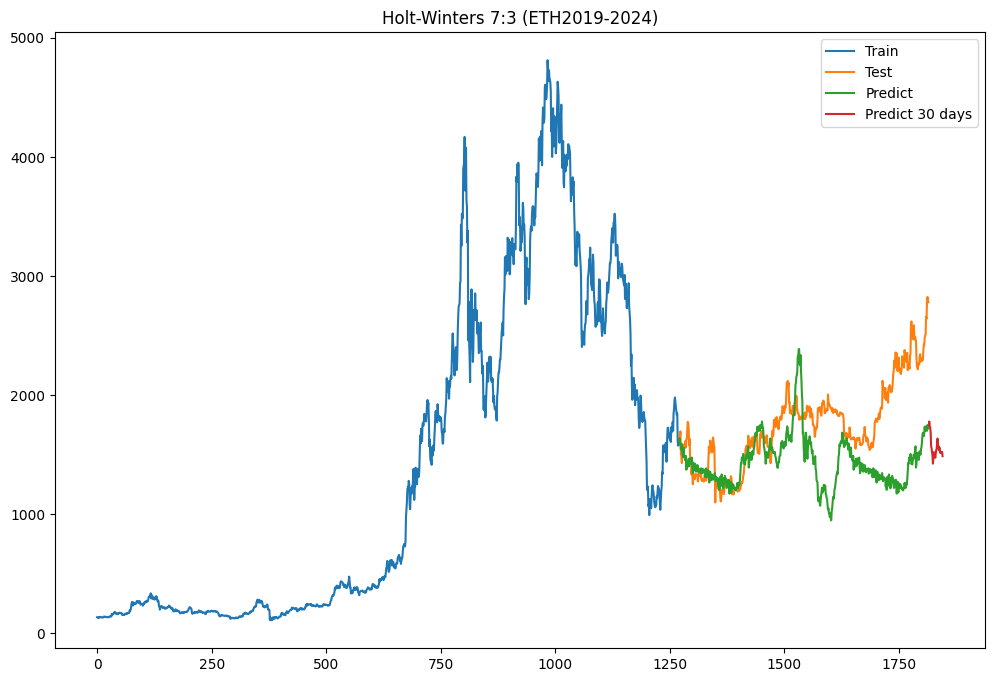

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    1751.456207
1816    1779.183665
1817    1740.643868
1818    1728.136370
1819    1686.353393
           ...     
1871    1738.107594
1872    1719.101260
1873    1663.042039
1874    1636.242500
1875    1618.938927
Length: 61, dtype: float64


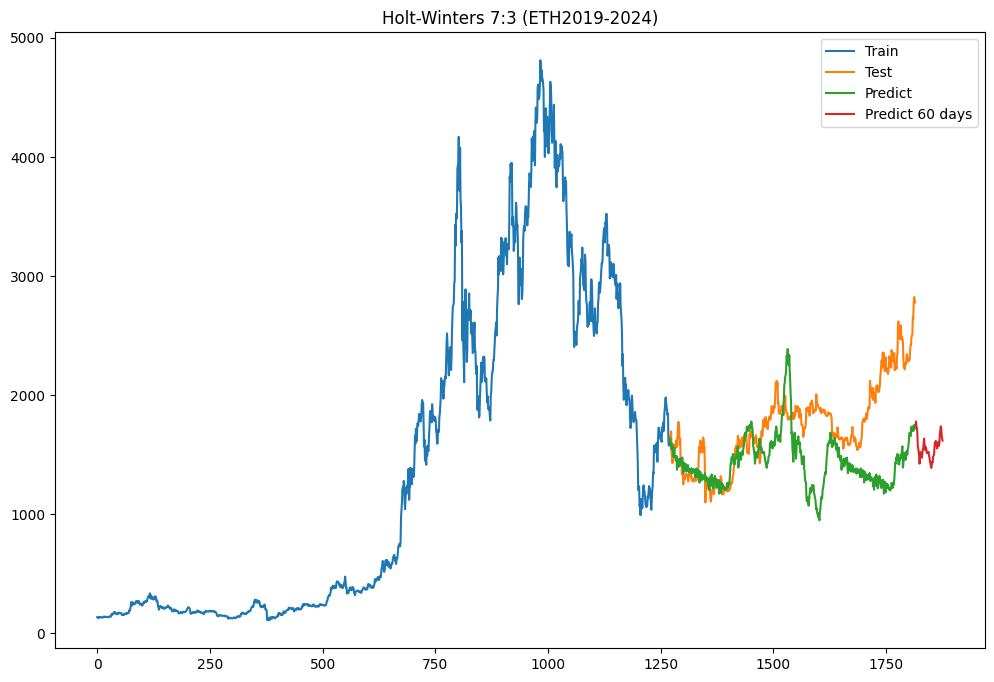

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    1751.456207
1816    1779.183665
1817    1740.643868
1818    1728.136370
1819    1686.353393
           ...     
1901    2210.480150
1902    2128.304761
1903    2009.819071
1904    1951.125903
1905    1674.096241
Length: 91, dtype: float64


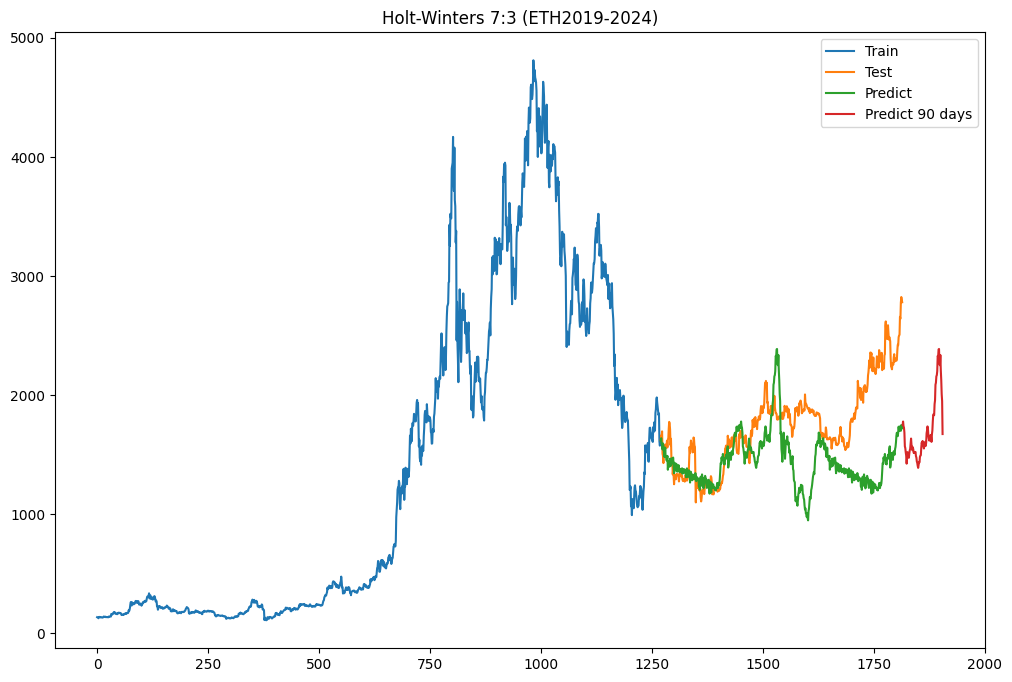

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

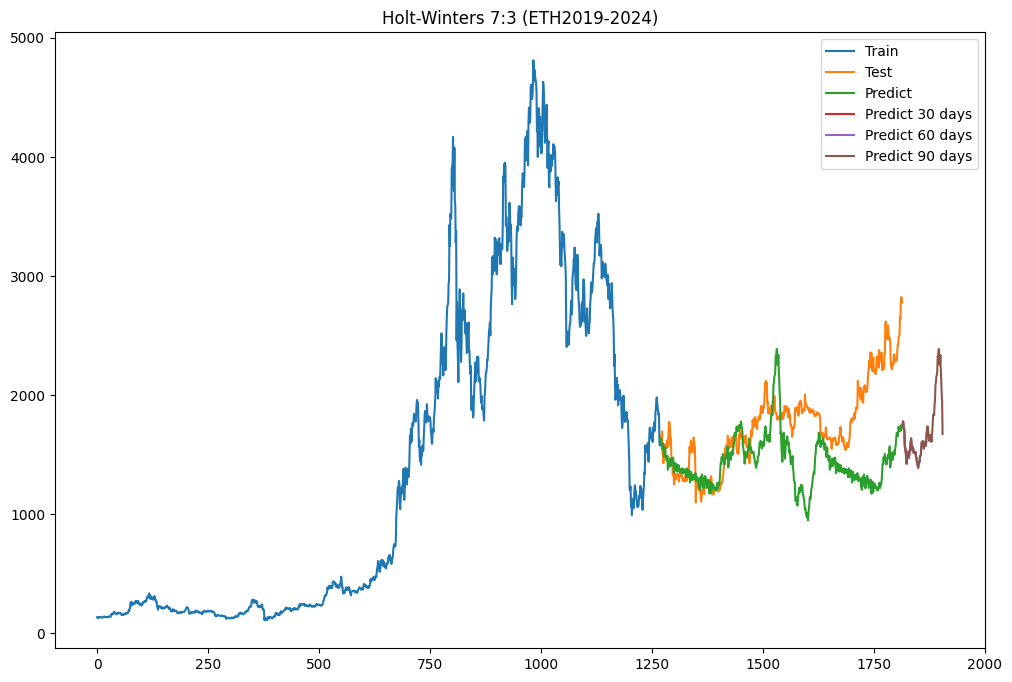

In [14]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 7:3 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()